# Rainfall

In [4]:
%matplotlib inline
from datetime import timedelta
import pandas as pd
from collections import namedtuple
from rdii.rain import find_rain_periods
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

## Load and clean data

In [2]:
df = pd.read_csv('../testdata/rainfall1.csv.gz', index_col='time', parse_dates=['time'])
rainfall = df['rainfall'].fillna(0).resample('1H').sum()
print(rainfall.head())
print(rainfall.describe())

time
2014-10-24 00:00:00    0.0
2014-10-24 01:00:00    0.0
2014-10-24 02:00:00    0.0
2014-10-24 03:00:00    0.0
2014-10-24 04:00:00    0.0
Freq: H, Name: rainfall, dtype: float64
count    30419.000000
mean         0.084427
std          0.691375
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         44.000000
Name: rainfall, dtype: float64


In [5]:
rains = find_rain_periods(rainfall)
print('Found {} rain events'.format(len(rains)))

Found 837 rain events


In [6]:
%timeit find_rain_periods(rainfall)

15 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
sorted_rains = rains.sort_values('intensity', ascending=False)
sorted_rains.head(10)

,start_date,end_date,intensity
691,2017-06-17 13:00:00,2017-06-17 15:00:00,44.000000
718,2017-07-07 18:00:00,2017-07-07 19:00:00,33.000000
137,2015-06-05 15:00:00,2015-06-05 16:00:00,25.000000
206,2015-09-19 14:00:00,2015-09-19 17:00:00,24.400000
726,2017-07-20 10:00:00,2017-07-20 12:00:00,23.800000
413,2016-06-11 03:00:00,2016-06-11 04:00:00,23.400000
423,2016-08-01 11:00:00,2016-08-01 13:00:00,21.000000
184,2015-08-10 12:00:00,2015-08-10 18:00:00,20.800000
736,2017-08-02 16:00:00,2017-08-02 19:00:00,19.600000
156,2015-06-22 21:00:00,2015-06-23 04:00:00,19.400001


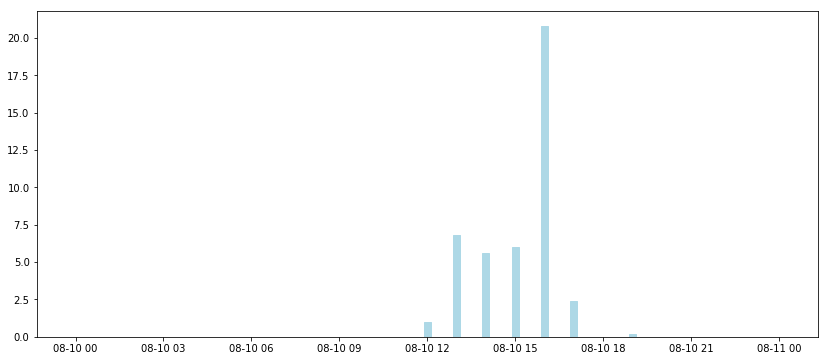

In [8]:
def plot_rain(ds, start_date, end_date):
    ds2 = ds[start:end]
    plt.bar(ds2.index, ds2, 0.01, edgecolor='lightblue', color='lightblue')
    plt.show()
    
index = 7
start = sorted_rains.iloc[index]['start_date'].date()
end = sorted_rains.iloc[index]['end_date'].date() + timedelta(days=1)
plot_rain(rainfall, start, end)